## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [5]:
#import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [6]:
#import data
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [40]:
#highlighting the number of rows and columns
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [41]:
#calculating the number of unique users 
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [42]:
#proportions of users converted
df['converted'].sum()/df['user_id'].count()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [43]:
#number of rows in which the new_page and treatment do not match 
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))== False].describe()

,user_id,converted
count,3893.000000,3893.000000
mean,785682.547906,0.124326
std,90159.968183,0.329995
min,630052.000000,0.000000
25%,708538.000000,0.000000
50%,783362.000000,0.000000
75%,864749.000000,0.000000
max,945971.000000,1.000000


f. Do any of the rows have missing values?

In [44]:
#finding the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are no missing values in our dataset

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [7]:
#number of rows in which the new_page and treatment do not match 
df_nomatch = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))== False]

In [8]:
#removing the rows in which 
df2 = df.drop(df_nomatch.index)

In [9]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [48]:
#checking whethet the unwanted data still exists 
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page'))== False]

,user_id,timestamp,group,landing_page,converted


In [49]:
#checking whethet the unwanted data still exists 
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page'))== False]

,user_id,timestamp,group,landing_page,converted


In [50]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

All the unwanted data has been removed from our dataset

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [51]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [52]:
#Number of unique users in our new dataset 
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [53]:
#Calculating the repeated user_id
df2[df2['user_id'].duplicated(keep = False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [54]:
#rows of the repeated user_id
df2[df2['user_id'].duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [55]:
#removing one of the duplicated_id
df2.drop(df2[df2['user_id'].duplicated(keep = False)].index[0], inplace = True)

In [56]:
df2[df2['user_id'].duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [57]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [58]:
#Probability of converting regardless of the page
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [59]:
#Probability of converting given the group is control 
df3 = df2.query("group == 'control'")
df4 = df3['converted'].mean()



In [60]:
df4

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [61]:
#Probability of converting given the group is treatment 
df5 = df2.query("group == 'treatment'")
df6 = df5['converted'].mean()

In [62]:
df6

0.11880806551510564

d. What is the probability that an individual received the new page?

In [63]:
#probability of getting a new_page
df.query("landing_page == 'new_page'").count()['landing_page']/df['landing_page'].count()

0.5

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

In [64]:
df2.query("group == 'treatment'").count()['group']

145310

In [65]:
df2.query("group == 'control'").count()['group']

145274

In [66]:
diff_group = df4-df6
diff_group

0.0015782389853555567

According to the probabilities, the control group (the group with the old page) converted at a higher rate than the teatment (the group with the new page). However, the magnitude of this change is very small with a difference of roughly 0.15%.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null-hypothesis

H0 : p_new - p_old <= 0 

i.e. The null hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be equal to zero (the same) or lower than zero (the old page has a higher population conversion rate).

Alternative-hypothesis

H1 : p_new - p_old >0

i.e. The alternative hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be greater than zero(the new page has a higher population conversion rate).


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [68]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [69]:
#Convert rate new under the null
p_new = df2['converted'].mean()
p_new

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

Under the null hypothesis, the conversion rate of both the pages will be the same

In [12]:
#Convert rate new under the null
p_old = df2['converted'].mean()
p_old

0.11959667567149027

c. What is $n_{new}$?

In [14]:
#number of times the new page appears 
n_new = df2.query("landing_page == 'new_page'")['landing_page'].count()
n_new

145311

d. What is $n_{old}$?

In [15]:
#number of times old page appears 
n_old = df2.query("landing_page == 'old_page'")['landing_page'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [33]:
#simulating the new_page_converted 
new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new,(1-p_new)])
new_page_converted.mean()

0.11907563777002429

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [34]:
#simulating the old_page_converted 
old_page_converted = np.random.choice([1,0], size=n_old, p=[p_old,(1-p_old)])
old_page_converted.mean()

0.12117791208337349

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [35]:
#Simulated P_new - p_old 
new_converted_simulation.mean() - old_converted_simulation.mean()

-8.149861285833282e-08

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [50]:
#Simulating p_new - p_old 10,000 times 
p_diffs = []
for i in range(1000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
    p_diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(p_diff)
    
    
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Calculating actual difference between the conversion rates of the pages 

In [51]:
p_actual_new = df2.query("landing_page == 'new_page'")['converted'].mean()
p_actual_new

0.11880724790277405

In [52]:
p_actual_old = df2.query("landing_page == 'old_page'")['converted'].mean()
p_actual_old

0.1203863045004612

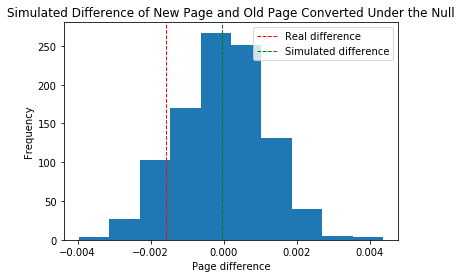

In [53]:
#plotting p_diffs

plt.hist(p_diffs)
plt.title('Simulated Difference of New Page and Old Page Converted Under the Null')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x=(p_actual_new-p_actual_old), color='r', linestyle='dashed', linewidth=1, label="Real difference")
plt.axvline(x=(np.array(p_diffs).mean()), color='g', linestyle='dashed', linewidth=1, label="Simulated difference")
plt.legend()
plt.show()





The simulated data creates a normal distribution as expected . The mean of this normal distribution is 0, which which is what the data should look like under the null hypothesis.


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [54]:
p_diff = p_actual_new - p_actual_old
p_diff

-0.0015790565976871451

In [55]:
#p_value
(p_diffs>p_diff).mean()

0.88600000000000001

The above number makes sense because the probability for a conversion of a new page is lower than both the mean and old page conversion rates.


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

If our sample conformed to the null hypothesis then we'd expect the proportion greater than the actual difference to be 0.05. However, we calculated that almost 90% of the population in our simulated sample lies above the real difference which suggests that new page does not do significantly better than the old page. Thus, from the above numbers, we fail to reject the null hypothesis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [60]:
# importing statsmodel
import statsmodels.api as sm

#number of old pages with conversion 

convert_old = df2.query("landing_page == 'old_page'")['converted'].sum()
convert_old



17489

In [57]:
#number of new pages with conversion
convert_new = df2.query("landing_page == 'new_page'")['converted'].sum()
convert_new

17264

In [58]:
#number of times the old page appears 
n_old = df2.query("landing_page == 'old_page'")['landing_page'].count()
n_old

145274

In [86]:
#number of times the new page appears 
n_new = df2.query("landing_page == 'new_page'")['landing_page'].count()
n_new

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [67]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], 
                                              nobs=[n_new, n_old], alternative = 'larger')
print("z-score:", z_score,
     "\np-value:", p_value)

z-score: -1.31160753391 
p-value: 0.905173705141


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The p_value of greater than 0.05 means that we fail to reject the null hypothesis and are not able to prove that new_page is better than the old in terms of conversion statistically

For alpha (Critical Value) = 0.05, the z - score of -1.31 gives the probability of 0.0951 from the z-table, which is greater than the crtical value and thus, we fail to reject the null hypothesis

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

As there are only two possible outcomes i.e. converted or not converted, we will use logisitic regression modelling for our analysis

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [49]:
# Creating a new dataframe, df3 for this part to avoid any confusion 
df3 = df2
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [51]:
# defining a function to split the group column and create ab_page column 
def conversion(group):
    if group == 'control':
        return 0
    else:
        return 1
df3['ab_page'] = df3['group'].apply(conversion)

In [52]:
#adding the intercept
df3['intercept'] = 1

In [19]:
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [23]:
#instatiating the model 
logit_mod = sm.Logit(df3['converted'], df3[['ab_page', 'intercept']])
#fit
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [53]:
#summarizing the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 May 2018   Pseudo R-squ.:               8.085e-06
Time:                        17:58:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Apparently the p-value associated with ab_page is 0.190, which is lower than the p-value calculated using the z-test above i.e. 0.9. The reason why this value is higher is because in Part II, we are concerned with the fact that which page has a higher conversion rate, so a one-tailed test. However, in part III, the nature of a regression test is not concerned with which one has a positive or negative change, specifically. It is concerned with if the condition had any effect at all, so a two-tailed test. In fact, 1 - (0.19)/2 gives us the p - value obtained in Part II of the project


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

While building our model, we need to be very clear about what will our model be used for. Will it represent how are inputs related to response, finding the best prediction or finding the inputs which best predicts the response. Adding too many variables might be a disadvantage as it may introduce correlated erros, non - constant variance, outliers and multicollinearity.

When we perform regression or categorization analysis, we want to have features which have large impacts on outcome, small impact variables are usually not influencial and should be left for the intercept.

A statistic which accounts for this is the correlation coefficiant, R², which will give lower outputs if low impact variables are added to our regression model.However, in our case, besides the intercept,only one feature was chosen to determine the impact on the conversion rate. Other features such as the time spent on the page might bring some interesting results and patterns as the longer a user spends time on a page, the more he/she is likely to be content with it and unwilling to move onto the next page.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [25]:
# reading the countries data
df_countries = pd.read_csv('countries.csv')

In [26]:
#viewing the countries data
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [30]:
#finding the number of unique countries in our country data
df_countries['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [27]:
#merging the two dataframes
df4 = df3.merge(df_countries, on = 'user_id')

In [28]:
df4.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [35]:
#creating the dummy variables
df4[['Canada','UK','US']] = pd.get_dummies(df4['country'])

In [37]:
df4.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,US,UK,Canada
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,1,0,0


In [40]:
#Taking Canada as our base variable 
logit_countries = sm.Logit(df4['converted'], 
                           df4[['US', 'UK', 'intercept']])

# Fit
result2 = logit_countries.fit()



Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


In [41]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Sun, 27 May 2018   Pseudo R-squ.:               1.521e-05
Time:                        17:41:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

Considering the p - values of the countries, the countries did have some effect on the conversion rate but not statistically significant in order to reject the null hypothesis 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:


# Create logit_countries object
logit_countries2 = sm.Logit(df4['converted'], 
                           df4[['ab_page', 'US', 'UK', 'intercept']])

# Fit
result3 = logit_countries2.fit()



Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [45]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sun, 27 May 2018   Pseudo R-squ.:               2.324e-05
Time:                        17:44:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
==============================================================================
"""



When considering the p - values of our combined combined model which includes the impact of pages (old or new) and countries, the p - values have definitely increased but they are not statistically significant to reject the null hypothesis 


# Conclusion 



Although it would seem from the outset that there is a difference between the conversion rates of new and old pages, there is just not enough evidence to reject the null hypothesis. From the histogram shown in this report, it seems that the new page does no better than the old page.

It was also found that this was not dependent on countries with conversion rates being roughly the same in the UK as in the US. The test conditions were fairly good as well, users had a roughly 50% chance to recieve the new and old pages and the sample size of the initial dataframe is sufficiently big such that collecting data is likely not a good use of resources.

Recommendation : The e-commerce company should not switch to the new page immediately and should first try to improve their current website. They should investigate the reasons for the poor performance of current webpage, and if they do wish to swith to a new page, the company should resesign the new page, which should be different from the new page designed in this case, and perform the A/b tests again to validate their hypothesis.


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255